# imports

In [1]:
from main import read_golden_standard, generate_truth, load_corpus, get_word2vec_models, generate_top_k_w2vec, evaluate_retrieval, plot, tf_idf_vectorizer, calc_topk_tf_idf, evaluate_retrieval_tfidf

/Users/dawarwaqar/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package brown to
[nltk_data]     /Users/dawarwaqar/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dawarwaqar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dawarwaqar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Read Simlex-999

In [2]:
lex_df = read_golden_standard("./data/SimLex-999.txt")

In [3]:
lex_df.head()

,word1,word2,score
0,old,new,1.58
1,new,old,1.58
2,smart,intelligent,9.2
3,intelligent,smart,9.2
4,hard,difficult,8.77


In [4]:
lex_df.tail()

,word1,word2,score
1993,attend,gather,4.8
1994,absorb,withdraw,2.97
1995,withdraw,absorb,2.97
1996,attend,arrive,6.08
1997,arrive,attend,6.08


# Generate the gold standard

In [5]:
golden = generate_truth(lex_df)

In [6]:
golden

{'son': {'kid': 10,
  'parent': 9,
  'boy': 8,
  'child': 7,
  'man': 6,
  'father': 5,
  'god': 4,
  'brother': 3,
  'daughter': 2,
  'soldier': 1},
 'arrive': {'come': 10,
  'appear': 9,
  'attend': 8,
  'gather': 7,
  'ignore': 6,
  'wander': 5,
  'remain': 4,
  'take': 3,
  'go': 2,
  'bring': 1},
 'ant': {'insect': 10, 'queen': 9, 'bee': 8},
 'hear': {'listen': 10,
  'obey': 9,
  'understand': 8,
  'acknowledge': 7,
  'learn': 6,
  'speak': 5},
 'cop': {'sheriff': 10},
 'sell': {'leave': 10,
  'begin': 9,
  'enter': 8,
  'send': 7,
  'allow': 6,
  'beg': 5,
  'come': 4,
  'keep': 3,
  'give': 2,
  'want': 1},
 'charcoal': {'coal': 10},
 'muscle': {'tongue': 10,
  'shoulder': 9,
  'cheek': 8,
  'jaw': 7,
  'teeth': 6,
  'body': 5,
  'ankle': 4,
  'elbow': 3,
  'arm': 2,
  'bone': 1},
 'movie': {'film': 10},
 'people': {'population': 10,
  'cannon': 9,
  'knife': 8,
  'party': 7,
  'dawn': 6,
  'gun': 5,
  'wife': 4,
  'cent': 3,
  'balloon': 2,
  'trick': 1},
 'champion': {'winner'

# Load the corpus (brown)

In [7]:
news_corpus, romance_corpus = load_corpus('news', 'romance')

In [8]:
news_corpus[0]

['the',
 'fulton',
 'county',
 'grand',
 'jury',
 'said',
 'friday',
 'investigation',
 'atlanta',
 'recent',
 'primary',
 'election',
 'produced',
 'evidence',
 'irregularities',
 'took',
 'place']

# Vector Semantics

In [9]:
models_news = get_word2vec_models(news_corpus, 'news')

Training Word2Vec model for corpus 'news', window size: 1, vector size: 10
Saving trained Word2Vec model to: ./models/word2vec.model.news.window_size=1.vector_size=10
Training Word2Vec model for corpus 'news', window size: 1, vector size: 50
Saving trained Word2Vec model to: ./models/word2vec.model.news.window_size=1.vector_size=50
Training Word2Vec model for corpus 'news', window size: 1, vector size: 100
Saving trained Word2Vec model to: ./models/word2vec.model.news.window_size=1.vector_size=100
Training Word2Vec model for corpus 'news', window size: 1, vector size: 300
Saving trained Word2Vec model to: ./models/word2vec.model.news.window_size=1.vector_size=300
Training Word2Vec model for corpus 'news', window size: 2, vector size: 10
Saving trained Word2Vec model to: ./models/word2vec.model.news.window_size=2.vector_size=10
Training Word2Vec model for corpus 'news', window size: 2, vector size: 50
Saving trained Word2Vec model to: ./models/word2vec.model.news.window_size=2.vector_si

In [10]:
models_romance = get_word2vec_models(romance_corpus, 'romance')

Training Word2Vec model for corpus 'romance', window size: 1, vector size: 10
Saving trained Word2Vec model to: ./models/word2vec.model.romance.window_size=1.vector_size=10
Training Word2Vec model for corpus 'romance', window size: 1, vector size: 50
Saving trained Word2Vec model to: ./models/word2vec.model.romance.window_size=1.vector_size=50
Training Word2Vec model for corpus 'romance', window size: 1, vector size: 100
Saving trained Word2Vec model to: ./models/word2vec.model.romance.window_size=1.vector_size=100
Training Word2Vec model for corpus 'romance', window size: 1, vector size: 300
Saving trained Word2Vec model to: ./models/word2vec.model.romance.window_size=1.vector_size=300
Training Word2Vec model for corpus 'romance', window size: 2, vector size: 10
Saving trained Word2Vec model to: ./models/word2vec.model.romance.window_size=2.vector_size=10
Training Word2Vec model for corpus 'romance', window size: 2, vector size: 50
Saving trained Word2Vec model to: ./models/word2vec.m

In [11]:
#get top k for word2vec news
top_k_w2vec_news = generate_top_k_w2vec(golden, models_news)

In [12]:
#get top k for word2vec romance
top_k_w2vec_romance = generate_top_k_w2vec(golden, models_romance)

In [13]:
first_key, first_value = next(iter(top_k_w2vec_news.items()))
print(first_key,first_value)

word2vec.model.news.window_size=1.vector_size=10 {'son': {'arundel': 10, 'queen': 9, 'ala': 8, 'former': 7, 'wrote': 6, 'bernard': 5, 'lee': 4, 'temple': 3, 'formerly': 2, 'hillsboro': 1}, 'arrive': {'asked': 10, 'brandt': 9, 'argued': 8, 'owners': 7, 'harry': 6, 'monday': 5, 'friday': 4, 'side': 3, 'managers': 2, 'carey': 1}, 'hear': {'respect': 10, 'split': 9, 'today': 8, 'likely': 7, 'benington': 6, 'allowed': 5, 'remarked': 4, 'another': 3, 'side': 2, 'joe': 1}, 'sell': {'enjoyed': 10, 'learn': 9, 'responsibility': 8, 'biggest': 7, 'balls': 6, 'records': 5, 'single': 4, 'example': 3, 'liquor': 2, 'mantle': 1}, 'movie': {'recommendations': 10, 'coal': 9, 'with': 8, 'qualified': 7, 'require': 6, 'lower': 5, 'bring': 4, 'individual': 3, 'groups': 2, 'consultant': 1}, 'people': {'german': 10, 'compromise': 9, 'impression': 8, 'communism': 7, 'look': 6, 'needs': 5, 'takes': 4, 'coal': 3, 'firms': 2, 'while': 1}, 'champion': {'radio': 10, 'ex': 9, 'los': 8, 'pennsylvania': 7, 'miami': 6,

In [14]:
first_key, first_value = next(iter(top_k_w2vec_romance.items()))
print(first_key,first_value)

word2vec.model.romance.window_size=1.vector_size=10 {'son': {'mine': 10, 'announced': 9, 'chosen': 8, 'johnnie': 7, 'here': 6, 'years': 5, 'san': 4, 'student': 3, 'a': 2, 'parents': 1}, 'hear': {'see': 10, 'say': 9, 'already': 8, 'stop': 7, 'meant': 6, 'baseball': 5, 'wait': 4, 'change': 3, 'thank': 2, 'wake': 1}, 'people': {'thick': 10, 'sir': 9, 'was': 8, 'stayed': 7, 'minute': 6, 'enough': 5, 'suggested': 4, 'pleasure': 3, 'maybe': 2, 'cared': 1}, 'keep': {'naked': 10, 'meant': 9, 'felt': 8, 'yellow': 7, 'warm': 6, 'leadership': 5, 'mean': 4, 'say': 3, 'small': 2, 'brown': 1}, 'man': {'passion': 10, 'line': 9, 'years': 8, 'expensive': 7, 'year': 6, 'danger': 5, 'age': 4, 'san': 3, 'woman': 2, 'country': 1}, 'trip': {'type': 10, 'anywhere': 9, 'tuxapoka': 8, 'pay': 7, 'there': 6, 'worse': 5, 'main': 4, 'dear': 3, 'rich': 2, 'months': 1}, 'baseball': {'wake': 10, 'janice': 9, 'truth': 8, 'hear': 7, 'susan': 6, 'desk': 5, 'quick': 4, 'going': 3, 'pictures': 2, 'could': 1}, 'captain': {

## evaluating

In [15]:
ndcg_top_model_news_w2vec = evaluate_retrieval(golden, top_k_w2vec_news)

In [16]:
ndcg_top_model_news_w2vec

('word2vec.model.news.window_size=5.vector_size=10', 0.012281276411750875)

In [17]:
ndcg_top_model_romance_w2vec = evaluate_retrieval(golden, top_k_w2vec_romance)

In [18]:
ndcg_top_model_romance_w2vec

('word2vec.model.romance.window_size=2.vector_size=300', 0.013613981661970979)

## Plot

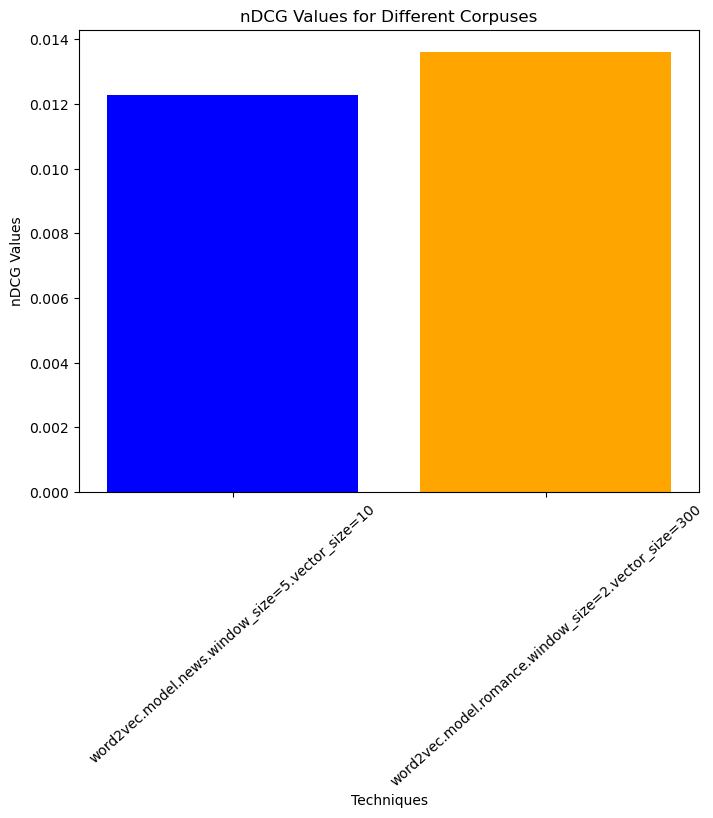

<Figure size 640x480 with 0 Axes>

In [19]:
plot(ndcg_top_model_news_w2vec, ndcg_top_model_romance_w2vec) 

# TF-IDF Vectorizer

In [20]:
tf_idf_news = tf_idf_vectorizer(news_corpus)

In [21]:
tf_idf_news.head()

,000,01,05,065,076,082,09,10,100,1000,...,zinc,zing,zinman,zoe,zombies,zone,zoning,zubkovskaya,zurcher,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
tf_idf_news.iloc[[0]]

,000,01,05,065,076,082,09,10,100,1000,...,zinc,zing,zinman,zoe,zombies,zone,zoning,zubkovskaya,zurcher,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
tf_idf_romance = tf_idf_vectorizer(romance_corpus)

In [24]:
tf_idf_romance.head()

,10,141,160,1935,1936,1938,1940,1944,230,4000,...,youth,yuki,zen,zend,zenith,zero,zest,zion,zip,zoooop
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Top k for tf-idf vector

In [ ]:
top_10_tf_idf_news = calc_topk_tf_idf(tf_idf_news, golden)

In [ ]:
{key: top_10_tf_idf_news[key] for key in list(top_10_tf_idf_news.keys())[:5]}

In [ ]:
top_10_tf_idf_romance = calc_topk_tf_idf(tf_idf_romance, golden)

In [ ]:
{key: top_10_tf_idf_romance[key] for key in list(top_10_tf_idf_romance.keys())[:5]}

## evaluating

In [ ]:
ndcg_news_tfidf = evaluate_retrieval_tfidf(golden, top_10_tf_idf_news)

In [ ]:
ndcg_news_tfidf

In [ ]:
ndcg_romance_tfidf = evaluate_retrieval_tfidf(golden, top_10_tf_idf_romance)

In [ ]:
ndcg_romance_tfidf